In [5]:
import psycopg2

DB_NAME = "paier"
DB_USER = "postgres"
DB_PASSWORD = "1"
DB_HOST = "localhost"
DB_PORT = "5432"

# Get data training from database
def get_data_train():
    try:
        conn = psycopg2.connect(
            dbname=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT
        )

        cur = conn.cursor()
        query = "SELECT * FROM public.bko;"
        cur.execute(query)
        unique_locations = cur.fetchall()
        
        cur.close()
        conn.close()

        return unique_locations

    except Exception as e:
        print(f"Error: {e}")
        return []

In [6]:
unique_locations = get_data_train()
unique_locations

[(1, 1, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (2, 7, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (3, 9, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (4, 10, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (5, 13, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (6, 15, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (7, 16, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (8, 17, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (9, 18, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (10, 11, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (11, 21, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (12, 22, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fitri ', 'TNI'),
 (13, 20, '1', 1, Decimal('260000.00'), 'Orang/Satuan', 'Idul Fi

# Prepare the Dataset

In [3]:
# import pandas as pd
# import requests
# from datetime import datetime

# # API for "Hari Besar", used for BKO recomendation
# url = "https://dayoffapi.vercel.app/api"

# response = requests.get(url)
# data = response.json()

# locations = unique_locations

# current_year = datetime.now().year

# # Find the keyword/unique value in API endpoint to get the event
# event_mapping = [
#     { "keyword": "masehi", "event": "Tahun Baru" },
#     { "keyword": "imlek", "event": "Tahun Baru Imlek" }, 
#     { "keyword": "nyepi", "event": "Hari Raya Nyepi" },
#     { "keyword": "idul fitri", "event": "Hari Raya Idul Fitri" }, 
#     { "keyword": "waisak", "event": "Hari Raya Waisak" },
#     { "keyword": "idul adha", "event": "Hari Raya Idul Adha" },
#     { "keyword": "kemerdekaan", "event": "Hari Kemerdekaan Republik Indonesia" },
#     { "keyword": "natal", "event": "Hari Raya Natal" }
# ]

# # Helper function to find the event in the mapping
# def find_event(holiday_description):
#     for event in event_mapping:
#         if event["keyword"].lower() in holiday_description.lower():
#             return event["event"], event["keyword"]
#     return None, None

In [5]:
rows = []

# Group the events by name to manage shifts
event_dates = {}
for holiday in data:
    event_name, keyword = find_event(holiday["keterangan"])
    if event_name:
        if event_name not in event_dates:
            event_dates[event_name] = []
        event_dates[event_name].append((holiday["tanggal"], keyword))

# Iterate over the events and locations to populate the list
for event_name, dates in event_dates.items():
    for date_idx, (date, keyword) in enumerate(dates):
        shift = 1 if date_idx == 0 else 2
        for location in locations:
            rows.append({
                'Tanggal': date,
                'Hari': 1,
                'Lokasi': location,
                'Shift': shift,
                'Jumlah Personil': 1,
                'Harga Satuan': 260000,
                'Satuan': 'Orang/Shift',
                'Event': event_name,
                'Personil': 'TNI',
                'keyword': keyword
            })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(rows)

# Ensure 'Tanggal' is in datetime format
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Sort the DataFrame by 'Lokasi' and 'Tanggal'
df = df.sort_values(by=['Lokasi', 'Tanggal'])

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

# Update 'Hari' column based on sorted DataFrame
for i in range(1, len(df)):
    if df.loc[i, 'Lokasi'] == df.loc[i-1, 'Lokasi'] and df.loc[i, 'keyword'] == df.loc[i-1, 'keyword']:
        df.loc[i, 'Hari'] = df.loc[i-1, 'Hari'] + 1
    else:
        df.loc[i, 'Hari'] = 1

df

,Tanggal,Hari,Lokasi,Shift,Jumlah Personil,Harga Satuan,Satuan,Event,Personil,keyword
0,2024-01-01,1,BATULICIN,1,1,260000,Orang/Shift,Tahun Baru,TNI,masehi
1,2024-02-09,1,BATULICIN,1,1,260000,Orang/Shift,Tahun Baru Imlek,TNI,imlek
2,2024-02-10,2,BATULICIN,2,1,260000,Orang/Shift,Tahun Baru Imlek,TNI,imlek
3,2024-03-11,1,BATULICIN,1,1,260000,Orang/Shift,Hari Raya Nyepi,TNI,nyepi
4,2024-03-12,2,BATULICIN,2,1,260000,Orang/Shift,Hari Raya Nyepi,TNI,nyepi
...,...,...,...,...,...,...,...,...,...,...
391,2024-06-17,1,TPIL IX,1,1,260000,Orang/Shift,Hari Raya Idul Adha,TNI,idul adha
392,2024-06-18,2,TPIL IX,2,1,260000,Orang/Shift,Hari Raya Idul Adha,TNI,idul adha
393,2024-08-17,1,TPIL IX,1,1,260000,Orang/Shift,Hari Kemerdekaan Republik Indonesia,TNI,kemerdekaan
394,2024-12-25,1,TPIL IX,1,1,260000,Orang/Shift,Hari Raya Natal,TNI,natal


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Encoding categorical variables
label_encoder_lokasi = LabelEncoder()
df['Lokasi'] = label_encoder_lokasi.fit_transform(df['Lokasi'])

label_encoder_event = LabelEncoder()
df['keyword'] = label_encoder_event.fit_transform(df['keyword'])

# Features and targets
X = df[['Hari', 'Lokasi', 'keyword']]
y_shift = df['Shift']
y_jumlah_personil = df['Jumlah Personil']

# Train/Test Split without shuffling
X_train, X_test, y_shift_train, y_shift_test = train_test_split(X, y_shift, test_size=0.2, shuffle=False, random_state=42)
_, _, y_jumlah_personil_train, y_jumlah_personil_test = train_test_split(X, y_jumlah_personil, test_size=0.2, shuffle=False, random_state=42)

# Define and train the models
logreg_shift = LogisticRegression()
tree_jumlah_personil = DecisionTreeClassifier()

logreg_shift.fit(X_train, y_shift_train)
tree_jumlah_personil.fit(X_train, y_jumlah_personil_train)

# Predictions
y_shift_pred = logreg_shift.predict(X_test)
y_jumlah_personil_pred = tree_jumlah_personil.predict(X_test)

# Evaluations
shift_accuracy = accuracy_score(y_shift_test, y_shift_pred)
jumlah_personil_accuracy = accuracy_score(y_jumlah_personil_test, y_jumlah_personil_pred)

print("Shift Prediction Accuracy:", shift_accuracy)
print("Jumlah Personil Prediction Accuracy:", jumlah_personil_accuracy)

Shift Prediction Accuracy: 1.0
Jumlah Personil Prediction Accuracy: 1.0


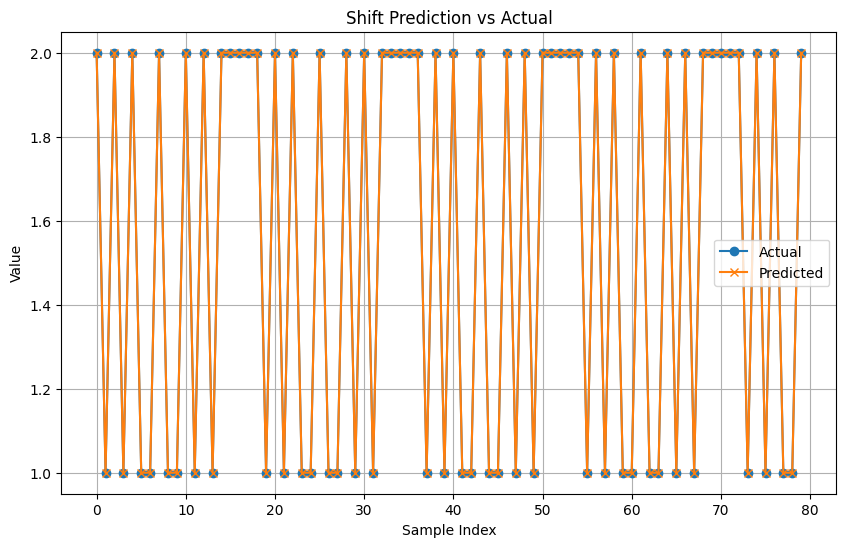

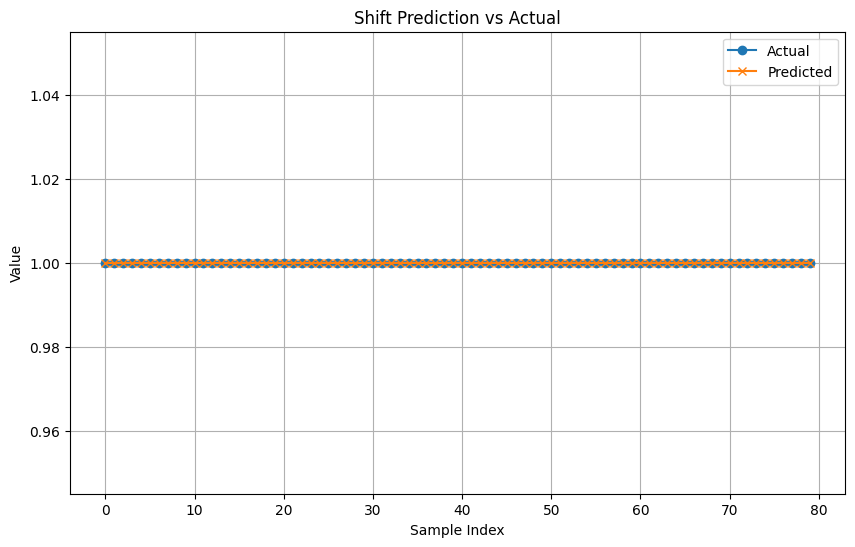

In [15]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_shift_test.values, y_shift_pred, 'Shift Prediction vs Actual')
plot_predictions(y_jumlah_personil_test.values, y_jumlah_personil_pred, 'Shift Prediction vs Actual')

In [18]:
import pickle

with open('model/predict/logreg_shift.pkl', 'wb') as file:
    pickle.dump(logreg_shift, file)

with open('model/predict/tree_jumlah_personil.pkl', 'wb') as file:
    pickle.dump(tree_jumlah_personil, file)

In [19]:
tree_jumlah_personil = pickle.load(open('model/predict/tree_jumlah_personil.pkl', 'rb'))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import pandas as pd

df_demo_bko = pd.read_csv("bko_massa.csv",  delimiter=',')
df_demo_bko

# Splitting features and target
X = df_demo_bko['JUMLAH MASA'].values.reshape(-1, 1)  # Features
y = df_demo_bko['BKO'].values  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
predict_demo_model = LinearRegression()
predict_demo_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = predict_demo_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 1.159310512097409
Mean Absolute Error: 0.9674100609214732


In [ ]:
# Saving the model using pickle
with open('model/predict/predict_demo.pkl', 'wb') as f:
    pickle.dump(predict_demo_model, f)